# Lecture 3: Classification / Regression

**Credits to Yisi!!** You can find her original notebook from [here](https://github.com/yisiszhang/AdvancedPython/blob/main/colab/Lecture3.ipynb).

In [29]:
# import some of our best friends
import numpy as np
import matplotlib.pyplot as plt

# classification packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

## Logistic regression

In [32]:
# make data with 2 predictors and draw from two clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=30, centers=2, n_features=2, random_state=0)

In [7]:
# train a classifier on the model
clf = LogisticRegression(random_state=0).fit(X, y)

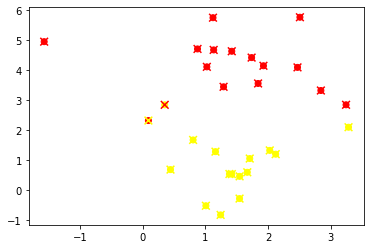

0.9333333333333333


In [10]:
y_pred = clf.predict(X)

plt.scatter(X[:,0],X[:,1],c=y, cmap='autumn')
plt.scatter(X[:,0],X[:,1],c=y_pred, s = 60, cmap='autumn', marker='x')
plt.show()

print(clf.score(X, y))

## Support vector machine

Let's draw a hyperplane that separate two classes in a 2d space.

We are looking for the hyperplane $\beta_0+\beta_1x_1+\beta_2x_2=0$
that separate the classes by maximizing the total distances for the training data to the plane.
Essentially, the total distance is
$d\propto\sum_{j=1}^ny_jf(X_j).$
In our case, the true separation is $x_1+x_2=0$

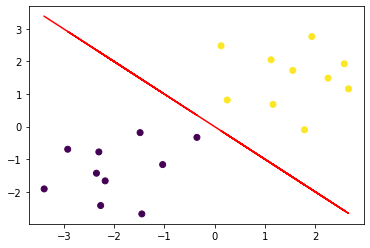

In [37]:
np.random.seed(35)
x = np.vstack((np.random.normal(-1.5,1,size = (10,2)), np.random.normal(1.5,1,size = (10,2))))
y = np.concatenate((-np.ones(10), np.ones(10)))
sep_true = - x[:,0]
# visualize
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x[:,0], sep_true,'r-')
plt.show()

### Maximimal margin classifier

In [26]:
# There can be virtually infinite choices of the hyperplanes
# find the one that maximize the margin
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x, y)

SVC(C=1000, kernel='linear')

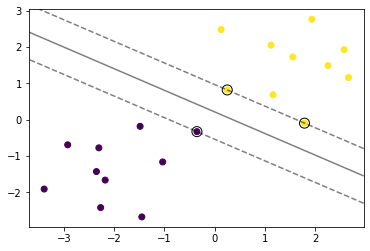

In [27]:
fig,ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y);

# create grid to evaluate model
xx = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 30)
yy = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Support vector classifier (SVC)

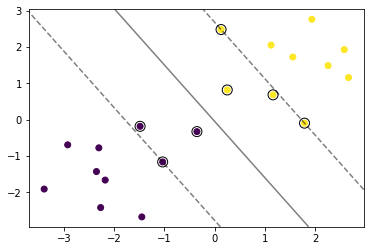

In [38]:
# change the parameter C for a soft boundary
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(x, y)

fig,ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y)

# create grid to evaluate model
xx = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 30)
yy = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


## Naive Bayes Classifier

In [39]:
# naive bayes
nb = GaussianNB().fit(x, y)

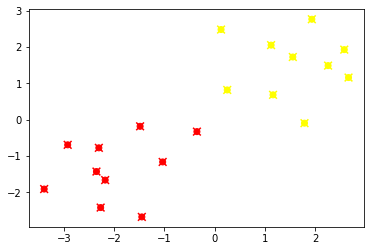

In [41]:
fig,ax = plt.subplots()
ax.scatter(x[:,0],x[:,1],c=y, cmap='autumn');
ax.scatter(x[:,0],x[:,1],c=nb.predict(x), s = 60, cmap='autumn', marker='x');

## K-means clustering

In [46]:
# try to do it yourself
from sklearn.cluster import KMeans

## Cross-validation

In [30]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, KFold

X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

kf = KFold(n_splits=5)
for train, test in kf.split(X, y):
  print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

print('========================================')

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train, test in skf.split(X, y):
  print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

train -  [30 50]   |   test -  [19  1]
train -  [44 36]   |   test -  [ 5 15]
train -  [39 41]   |   test -  [10 10]
train -  [34 46]   |   test -  [15  5]
train -  [49 31]   |   test -  [ 0 20]
train -  [39 41]   |   test -  [10 10]
train -  [39 41]   |   test -  [10 10]
train -  [39 41]   |   test -  [10 10]
train -  [39 41]   |   test -  [10 10]
train -  [40 40]   |   test -  [ 9 11]


# Homework
1. Increase the noise of the SVM data, use cross-validation to determine C.
2. Report test error of this problem.